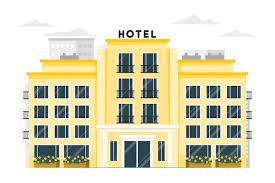

# **Objective:**

The objective of the project is to compare the effectiveness of two clustering methods, Agglomerative Hierarchical Clustering and K-Means Clustering, using a specific dataset.

The dataset contains information related to lodging revenue and customer demographics. The goal is to determine which clustering method yields more meaningful and interpretable clusters based on these features.

By evaluating the Silhouette Score and Davies-Bouldin Score for each clustering method, the project aims to identify the technique that provides the most distinct and well-separated clusters. This analysis will help in understanding the underlying patterns and relationships within the data, ultimately guiding decision-making processes and potentially uncovering insights for targeted marketing or customer segmentation strategies.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**GET DATA**

In [ ]:
df=pd.read_csv("/content/HotelCustomersDataset.csv")
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


**ABOUT THE DATA SET**

**Data Description:** The dataset consists of 83,590 customers' records and includes 31 variables that describe their behavior over a period of three years (2015 to 2018). Along with personal and behavioral data, the dataset also contains demographic and geographical information. All personal related data were transformed or anonymized to guaranty privacy and prevent the hotel or guests’ identification. Time-related variables were accounted for based on the last day of the extraction period. The last day of the extraction period is December 31, 2018.

**Data source location:**  The data came from a four-star hotel located in Lisbon, Portugal, Europe. In Portugal, hotels' star classification scale varies from 1 to 5, with one-star being the low-end quality hotels and five-star being the high-end quality hotels.

**Descriptive variables **

ID: Cutomer Id, Numeric

Nationality: country of origin, Categorical

Age: customer's age (in years), Numeric

Name Hash: Name of the customer's SHA2–256 hash string, categorical

DocID Hash: SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other), Categorical

DistributionChannel: Categorical

MarketSegment: Categorical

**Quantifying Variables**

Average Lead Time: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer

**Numeric**

Lodging Revenue: Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses, Numeric

Other Revenue: Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses, Numeric

Bookings Canceled: Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay), Numeric

Bookings No Showed: Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel), Numeric

Bookings CheckedIn: Number of bookings the customer made, and which end up with a staying, Numeric

Persons Nights: The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children, Numeric

Room Nights: Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking, Numeric

Days Since Last Stay: The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel, Numeric

Days Since First Stay: The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel, Numeric

SR High Floor: Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes), Boolean

SR Low Floor: Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes), Boolean

SR Accessible Room: Indication if the customer usually asks for an accessible room (0: No, 1: Yes), Boolean

SR Medium Floor: Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes), Boolean

SR Bath tub: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes), Boolean

SR Shower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes), Boolean

SR Crib: Indication if the customer usually asks for a crib (0: No, 1: Yes), Boolean

SR KingSizeBed: Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes), Boolean

SR TwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes), Boolean

SR Near Elevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes), Boolean

SR AwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes), Boolean

SR No Alcohol In MiniBar: Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes),Boolean

SR Quiet Room: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes), Boolean

In [ ]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [ ]:
df_noncat = df[['Age','DaysSinceCreation','AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay']]
df_cat = df[['Nationality','DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']]

# **Descriptive Analysis of the Dataset**
OBJECTIVES
To understand the descriptive statistics of the non-categorical (non-cat) variables in the dataset

In [ ]:
df_noncat.describe()


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
count,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,2.358536,401.067137,403.349013
std,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,2.281746,347.204955,347.971089
min,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,26.000000,27.000000
50%,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,2.000000,366.000000,369.000000
75%,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,4.000000,693.000000,697.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000


**MAIN OBSERVATIONS**

Average age of the respondents is **45 years**

Average led time of all the respondents being converted to actual revenue brining customers is 66 days

Average lodging revenue for 3 years is Dolar 299 and average of the revenue coming from other sources is Dolar 67 for 3 years

Booking Cancelled and Booking no show rates are almost negligable, indicating that the converation rate is high for the hotel

Day since last stay and first stay go hand in hand, there is hardly any difference in their average values

**INFERENCES**

The hotel can tailor its services and marketing strategies to attract customers in the age group of 45 years. This could include offering amenities and activities that are popular among this age group, such as spa treatments, fitness classes, and cultural experiences.

The reasons for the long led time can be analysed and steps can be taken to reduce it, such as streamlining the booking process, improving communication with customers, and offering incentives for early booking.

The hotel can also analyze the revenue sources and explore ways to increase the revenue from other sources, such as food and beverage sales, event bookings, and merchandise sales. This could include offering unique and high-quality products and experiences that differentiate the hotel from competitors.

The high conversion rate indicates that the hotel is doing a good job of converting bookings into actual revenue. The hotel can continue to focus on providing excellent customer service, personalized experiences, and competitive pricing to maintain and increase its conversion rate.

The similarity in the average values of the day since last stay and first stay suggests that the hotel has a loyal customer base. The hotel can continue to build and strengthen its relationships with existing customers by offering loyalty programs, personalized recommendations, and special promotions. The hotel can also encourage customers to refer their friends and family to increase the customer base.

**OBJECTIVE**

1)To understand the categorical (cat) variables of the dataset


In [ ]:
top_15 = df_cat['Nationality'].value_counts().head(15)
fig = px.pie(values = top_15.values,names=top_15.keys(), title='Distribution of Nationalities')
fig.show()

In [ ]:
DistributionChannel_stats = pd.concat([df_cat['DistributionChannel'].value_counts(), df_cat['DistributionChannel'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
DistributionChannel_stats

,count,percentage
Travel Agent/Operator,68569,82.0
Direct,11912,14.0
Corporate,2600,3.0
Electronic Distribution,509,1.0


In [ ]:
MarketSegment_stats = pd.concat([df_cat['MarketSegment'].value_counts(), df_cat['MarketSegment'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
MarketSegment_stats

,count,percentage
Other,48039,57.0
Travel Agent/Operator,11670,14.0
Direct,11457,14.0
Groups,9501,11.0
Corporate,2169,3.0
Complementary,510,1.0
Aviation,244,0.0


In [ ]:
SRKingSizeBed_stats = pd.concat([df_cat['SRKingSizeBed'].value_counts(), df_cat['SRKingSizeBed'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
SRKingSizeBed_stats

,count,percentage
0,54109,65.0
1,29481,35.0


In [ ]:
SRTwinBed_stats = pd.concat([df_cat['SRTwinBed'].value_counts(), df_cat['SRTwinBed'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
SRTwinBed_stats

,count,percentage
0,71675,86.0
1,11915,14.0


In [ ]:
SRNoAlcoholInMiniBar_stats = pd.concat([df_cat['SRNoAlcoholInMiniBar'].value_counts(), df_cat['SRNoAlcoholInMiniBar'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
SRNoAlcoholInMiniBar_stats

,count,percentage
0,83580,100.0
1,10,0.0


**OBSERVATIONS**

60% of the customers have their nationality as France, Portugal, Germany and Great Britain, with the maximum 17.3% coming from France and closely followed by protugal, 16.2%.

Among the four distribution channels through which the customers book their rooms in the hotel, namely, Travel Agent/Operator, Direct, Corporate and Electronic Distribution, Travel Agent/Operator constitute the maxium percentage, 82%

Amnong seven the Market segments that the customers can belong to, it is observed that the 57% of the customers cannot be classified in any specifoc segment and come under the 'Others' category. Nevertheless, a total of 39% of the customers belong to Travel Agent/Operator, groups and direct customers.

Further, from all the Boolean variables in the dataset only three variables have been analysed, which are

a. requirements of twin size beds

b. requirements for king size beds

c. requiremnt of alcohol minibars in the room

Only these three variables were used because they directly contribute to the revenue for the hotel.

From these three varaibles the following was observed:

a. Only 35% of the customers asked for king size beds and 14% asked for twin sized beds

b. No customer requested for alocohol minibars in their rooms

**INFERENCES**

The hotel can focus its marketing efforts towards the top nationalities, i.e., France, Portugal, Germany, and Great Britain.

Since Travel Agent/Operator is the most preferred booking channel, the hotel can form partnerships with popular travel agencies to attract more customers.

The hotel can analyze the needs and preferences of customers in the 'Others' category and try to create customized packages or offers to attract more customers.

The hotel can consider introducing more room options with king-size beds to cater to the preferences of customers who prefer larger beds.

# **Data Pre-Processing**

**OBJECTIVES:**

Identifying the null values in both cat and non-cat datasets

1.   Treating the null values by imputation
2.   Numeric coding of cat variables
3.   Identifying outliers using boxplots
4.   Treating the outliers
5.   Combining the pre-processed cat and non-cat dataframes into one (df_ppd)
6.   Diving the combined pre-processed dataset (df_ppd) into two, testing and
     training datasets (test_df and train_df)




**Brief on Analysis:**

The null values in the datasets were indentified using the info() functions

These null values were then treated using Simple Imputer with strategy as 'mean'

Numeric encoding of the categorical variables (Distribution Channel and Market Segment) was done using Label Encoder as the data was nominal

After identifying the outliers in each variable, they were treated using Normalization -> Min-Max Scaling

The cat and non_cat pre-processed datasets were then merged into one using the 'merge' function.

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nationality           83590 non-null  object
 1   DistributionChannel   83590 non-null  object
 2   MarketSegment         83590 non-null  object
 3   SRHighFloor           83590 non-null  int64 
 4   SRLowFloor            83590 non-null  int64 
 5   SRAccessibleRoom      83590 non-null  int64 
 6   SRMediumFloor         83590 non-null  int64 
 7   SRBathtub             83590 non-null  int64 
 8   SRShower              83590 non-null  int64 
 9   SRCrib                83590 non-null  int64 
 10  SRKingSizeBed         83590 non-null  int64 
 11  SRTwinBed             83590 non-null  int64 
 12  SRNearElevator        83590 non-null  int64 
 13  SRAwayFromElevator    83590 non-null  int64 
 14  SRNoAlcoholInMiniBar  83590 non-null  int64 
 15  SRQuietRoom           83590 non-null

In [ ]:
df_noncat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 79811 non-null  float64
 1   DaysSinceCreation   83590 non-null  int64  
 2   AverageLeadTime     83590 non-null  int64  
 3   LodgingRevenue      83590 non-null  float64
 4   OtherRevenue        83590 non-null  float64
 5   BookingsCanceled    83590 non-null  int64  
 6   BookingsNoShowed    83590 non-null  int64  
 7   BookingsCheckedIn   83590 non-null  int64  
 8   PersonsNights       83590 non-null  int64  
 9   RoomNights          83590 non-null  int64  
 10  DaysSinceLastStay   83590 non-null  int64  
 11  DaysSinceFirstStay  83590 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 7.7 MB


Since, only the 'Age' variable in the non-cat dataset has missing values, it has been treated by simple imputer in the following code.

# **Missing data Imputation**

In [ ]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns)
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 83590 non-null  float64
 1   DaysSinceCreation   83590 non-null  float64
 2   AverageLeadTime     83590 non-null  float64
 3   LodgingRevenue      83590 non-null  float64
 4   OtherRevenue        83590 non-null  float64
 5   BookingsCanceled    83590 non-null  float64
 6   BookingsNoShowed    83590 non-null  float64
 7   BookingsCheckedIn   83590 non-null  float64
 8   PersonsNights       83590 non-null  float64
 9   RoomNights          83590 non-null  float64
 10  DaysSinceLastStay   83590 non-null  float64
 11  DaysSinceFirstStay  83590 non-null  float64
dtypes: float64(12)
memory usage: 7.7 MB


Data encoding
Data encoding was done for 'Ditribution Channel' and 'Market Segment Channel' because these variables directly help in describing the customers and understand their behavior.

In [ ]:
df_cat_code = df_cat.copy()

In [ ]:
# Using Scikit Learn : Label Encoder (Inferior)
le = LabelEncoder()
le_fit1 = le.fit_transform(df_cat_code['DistributionChannel'])
le_fit2 = le.fit_transform(df_cat_code['MarketSegment'])
df_gen_code = pd.DataFrame(le_fit1, columns=['DistributionChannel_code']); df_gen_code
df_edu_code = pd.DataFrame(le_fit2, columns=['MarketSegment_code']); df_edu_code
df_gen_edu_code = df_gen_code.join(df_edu_code); df_gen_edu_code
df_cat_code_le = df_cat_code.join(df_gen_edu_code); df_cat_code_le # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Label Encoder


,Nationality,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code
0,PRT,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,PRT,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
2,DEU,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
3,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
4,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
83586,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5
83587,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5
83588,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,3,5


**Visualising the outliers**

Box plots for all the non-cat variables was constructed to identify which variable contains the outliers.

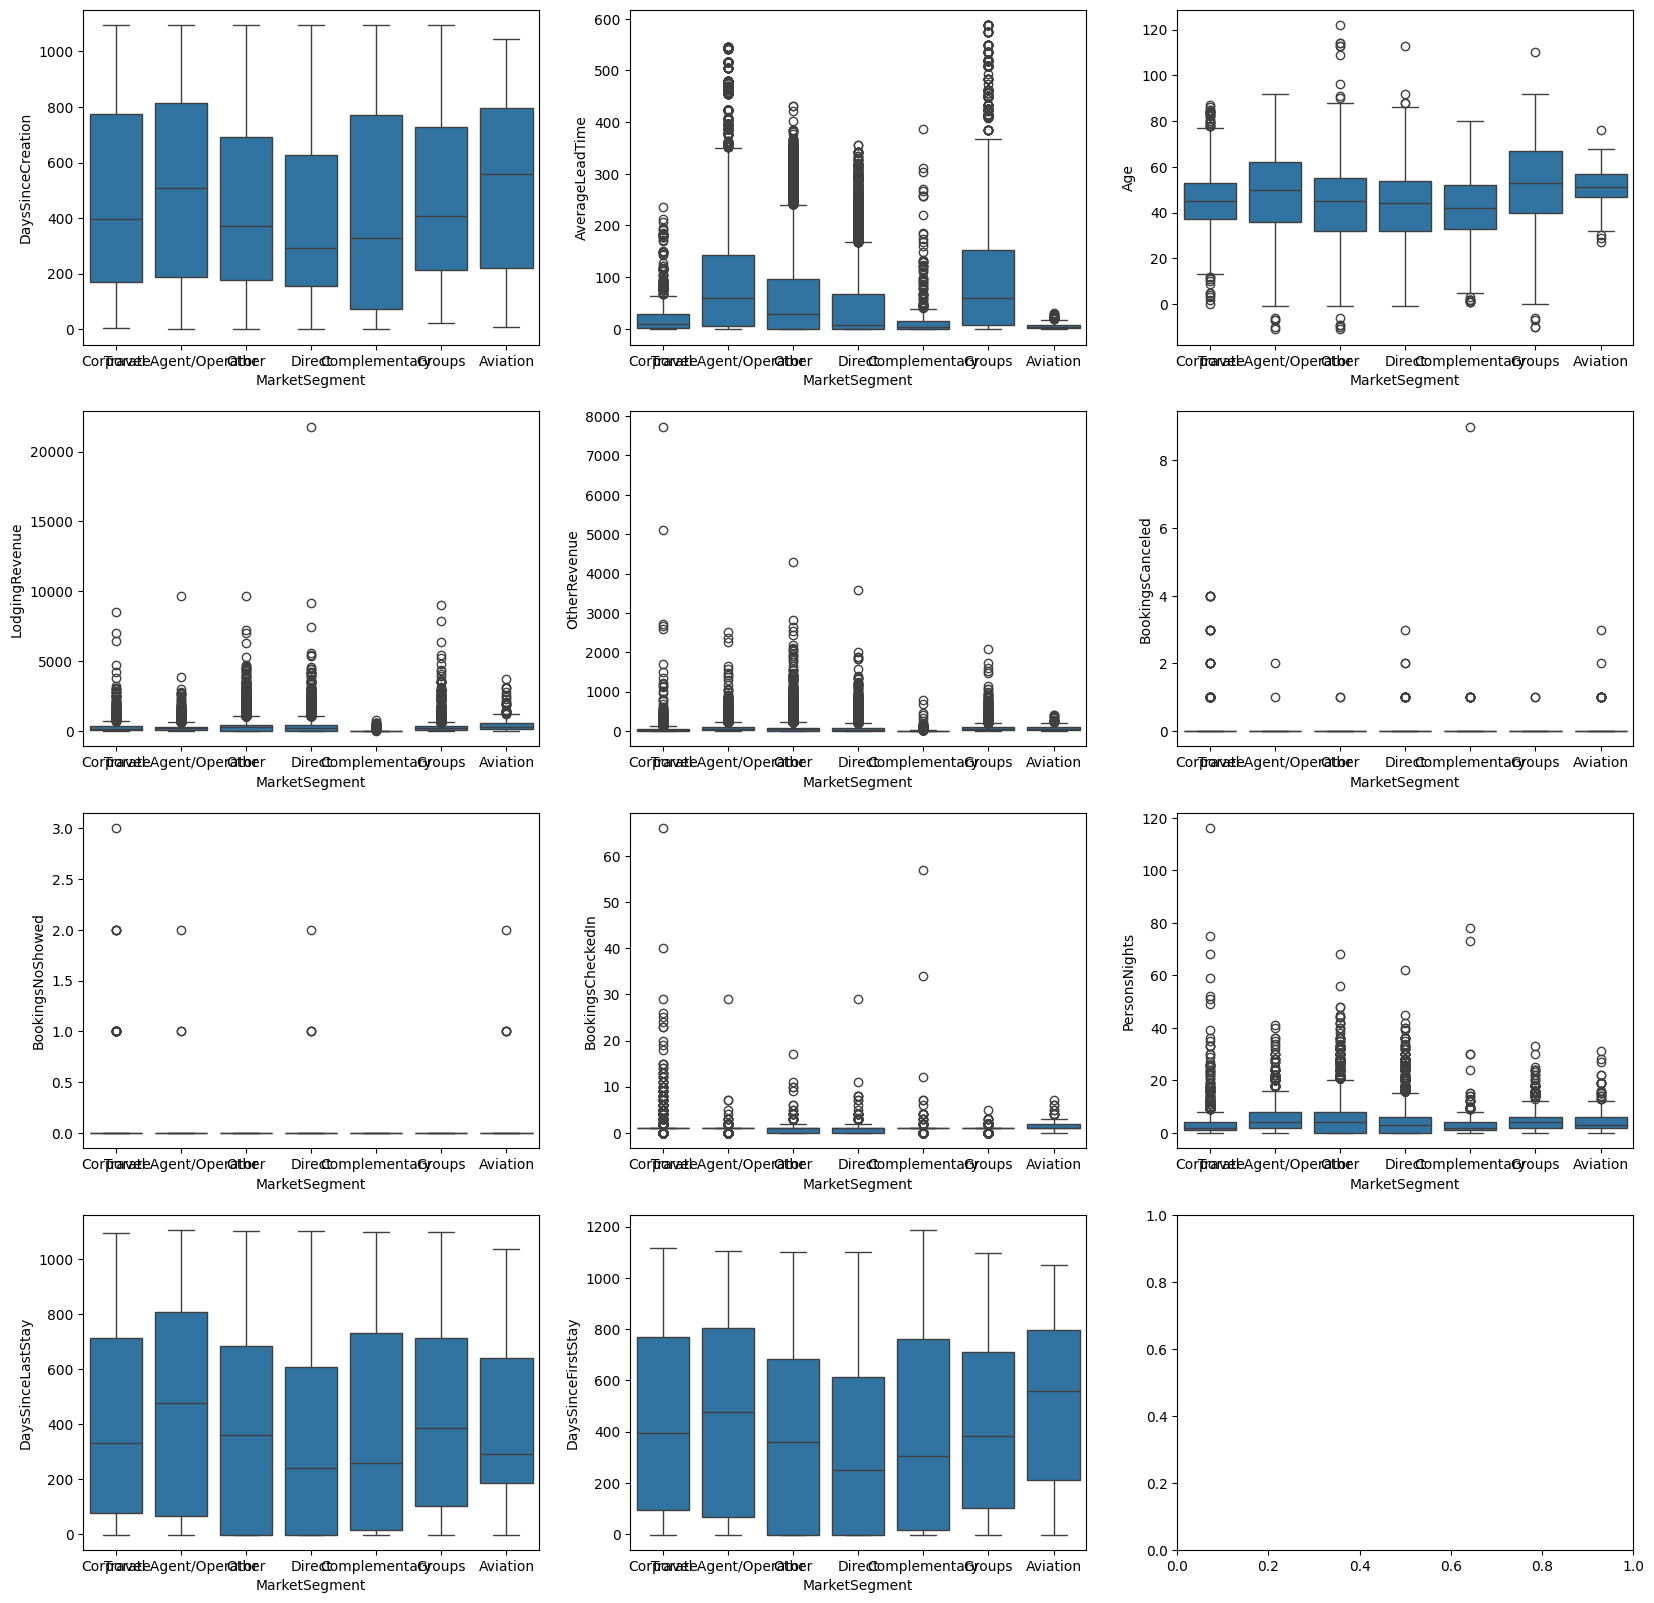

In [ ]:
f , axes = plt.subplots(4,3, figsize = (20, 20))

sns.set_style("darkgrid")

fig1 = sns.boxplot(data=df, x='MarketSegment', y='DaysSinceCreation', ax = axes[0,0])

fig2 = sns.boxplot(data=df, x='MarketSegment', y='AverageLeadTime', ax = axes [0,1])

fig3 = sns.boxplot(data=df, x='MarketSegment', y='Age', ax = axes [0,2])

fig4 = sns.boxplot(data=df, x='MarketSegment', y='LodgingRevenue', ax = axes [1,0])

fig5 = sns.boxplot(data=df, x='MarketSegment', y='OtherRevenue', ax = axes [1,1])

fig6 = sns.boxplot(data=df, x='MarketSegment', y='BookingsCanceled', ax = axes [1,2])

fig7 = sns.boxplot(data=df, x='MarketSegment', y='BookingsNoShowed', ax = axes [2,0])

fig8 = sns.boxplot(data=df, x='MarketSegment', y='BookingsCheckedIn', ax = axes [2,1])

fig9 = sns.boxplot(data=df, x='MarketSegment', y='PersonsNights', ax = axes [2,2])

fig10 = sns.boxplot(data=df, x='MarketSegment', y='DaysSinceLastStay', ax = axes [3,0])

fig11= sns.boxplot(data=df, x='MarketSegment', y='DaysSinceFirstStay', ax = axes [3,1])

**Observation:**

From the above box plots, it can be clearly seen that 'AverageLeadTime', 'Age', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn' and 'PersonsNights' are the variables that contain the outliers. Hence, using normalisation we will be treating these outliers.

**Outlier data treatment**

In [ ]:
# Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdi_si[['AverageLeadTime', 'Age', 'LodgingRevenue', 'OtherRevenue',
                                              'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['Age_norm', 'AverageleadTime_norm', 'LodgingRevenue_norm',
                                                       'OtherRevenue_norm', 'BookingsCanceled_norm', 'BookingsNoShowed_norm',
                                                      'BookingsCheckedIn_norm', 'PersonsNights_norm'])
df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat_mdi_si.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,51.000000,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,5.0,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,45.398028,1095.0,61.0,280.0,53.0,0.0,0.0,1.0,10.0,5.0,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,31.000000,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,60.000000,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,5.0,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,51.000000,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,47.000000,0.0,109.0,327.1,277.5,0.0,0.0,1.0,6.0,3.0,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,85.000000,0.0,109.0,981.3,9.0,0.0,0.0,1.0,6.0,3.0,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


**Combining the pre-processed cat and non-cat dataframes into one dataframe**

In [ ]:
df_cat_ppd = df_cat_code_le.copy(); df_cat_ppd # Preferred Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd # Preferred Data Subset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Nationality,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,PRT,Corporate,Corporate,0,0,0,0,0,0,0,...,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,PRT,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,DEU,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


In [ ]:
df_ppd.columns

Index(['Nationality', 'DistributionChannel', 'MarketSegment', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'DistributionChannel_code', 'MarketSegment_code', 'Age',
       'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm'],
      dtype='object')

In [ ]:
#Keeping only the normalised and numeric encoded variables in the data frame for the ease of further analysis
df_ppd1 =df_ppd[['SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'DistributionChannel_code', 'MarketSegment_code', 'DaysSinceCreation', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm']]
df_ppd1

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,0,0,0,0,0,0,0,0,0,0,...,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,0,0,0,0,0,0,0,0,0,0,...,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,0,0,0,0,0,0,0,1,0,0,...,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,0,0,0,0,0,0,0,1,0,0,...,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,0,0,0,0,0,0,0,0,1,0,...,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


In [ ]:
df_ppd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SRHighFloor               83590 non-null  int64  
 1   SRLowFloor                83590 non-null  int64  
 2   SRAccessibleRoom          83590 non-null  int64  
 3   SRMediumFloor             83590 non-null  int64  
 4   SRBathtub                 83590 non-null  int64  
 5   SRShower                  83590 non-null  int64  
 6   SRCrib                    83590 non-null  int64  
 7   SRKingSizeBed             83590 non-null  int64  
 8   SRTwinBed                 83590 non-null  int64  
 9   SRNearElevator            83590 non-null  int64  
 10  SRAwayFromElevator        83590 non-null  int64  
 11  SRNoAlcoholInMiniBar      83590 non-null  int64  
 12  SRQuietRoom               83590 non-null  int64  
 13  DistributionChannel_code  83590 non-null  int64  
 14  Market

#**Agglomerative Hierarchial Clustering**

**OBJECTIVES:**

To perform agglomerative hierarchial clustering using the most important variables (DistributionChannel_code and MarketSegment_code)

Briefs on the analysis:

a. We identified the 2 most important variables and used agglomerative hierarchial clustering by grouping the Lodging Revenue in the pre-processed dataset using the 2 variables.

b. We evaluated the cluster numbers formed using the Silhoutte Score and Davies-Bouldin Score

c. The selected cluster number model was then used to plot a dendrogram.

In [ ]:
group_data = pd.DataFrame({'Lodging Revenue': df_ppd.groupby(['MarketSegment_code','DistributionChannel_code'])['LodgingRevenue'].sum()})
group_data

Lodging Revenue
MarketSegment_code DistributionChannel_code                 
0                  0                               126808.15
                   3                                 3484.20
1                  0                                  685.50
                   1                                 2927.20
                   3                                 8020.56
2                  0                               547387.09
                   1                                13060.50
                   2                                  815.00
                   3                               112982.15
3                  0                                25612.55
                   1                              3492216.12
                   2                                 2929.20
                   3                               108408.46
4                  0                               108585.04
                   1                                43267.07
                   2                                  804.00
                   3                              2482975.08
5                  0                                 9411.53
                   1                                44169.31
                   2                               137047.89
                   3                             15029382.56
6                  0                                30088.60
                   1                                11734.23
                   2                                 3701.40
                   3                              2630363.07

In [ ]:
ah_2cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
ah_2cluster_model = ah_2cluster.fit_predict(group_data); ah_2cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [ ]:
ah_3cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
ah_3cluster_model = ah_3cluster.fit_predict(group_data); ah_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 0])

In [ ]:
ah_4cluster = agclus(n_clusters=4, affinity='euclidean', linkage='ward')
ah_4cluster_model = ah_4cluster.fit_predict(group_data); ah_4cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 2])

In [ ]:
sscore_ah_2cluster = sscore(group_data, ah_2cluster_model); sscore_ah_2cluster

0.9087717701520686

In [ ]:
dbscore_ah_2cluster = dbscore(group_data, ah_2cluster_model); dbscore_ah_2cluster

0.04273621037674843

In [ ]:
sscore_ah_3cluster = sscore(group_data, ah_3cluster_model); sscore_ah_3cluster

0.9018518025349037

In [ ]:
dbscore_ah_3cluster = dbscore(group_data, ah_3cluster_model); dbscore_ah_3cluster

0.1273895249333951

In [ ]:
sscore_ah_4cluster = sscore(group_data, ah_4cluster_model); sscore_ah_4cluster

0.8735325283494362

In [ ]:
dbscore_ah_4cluster = dbscore(group_data, ah_4cluster_model); dbscore_ah_4cluster

0.055491575519518894

**Analysis:**

sscore values:

2 clusters: 0.9087

3 clusters: 0.9018

4 clusters: 0.8735

dbscore values:

2 clusters: 0.0427

3 clusters: 0.1274

4 clusters: 0.0555

**Evaluation:**

**Silhouette Score (sscore):**

Higher sscore indicates better separation between clusters. In this case, 2 clusters has the highest sscore (0.9087), suggesting a clearer distinction between data points within each cluster.

**Davies-Bouldin Score (dbscore):**

Lower dbscore indicates better clustering. Here, both 2 clusters (0.0427) and 4 clusters (0.0555) have similar dbscores, suggesting comparable cluster separation.
Interpretation:

While both metrics provide insights, they might favor different aspects of clustering:

Silhouette score emphasizes within-cluster cohesion (data points being similar within a cluster).
Davies-Bouldin score focuses on inter-cluster separation (clusters being distinct from each other).

**Considering both scores:**

2 clusters: Highest sscore but similar dbscore compared to 4 clusters. This suggests potentially good within-cluster similarity but might not have a significant advantage in separation compared to 4 clusters.

3 clusters: Lower sscore and higher dbscore compared to 2 and 4 clusters. This might indicate a trade-off where separation increases (higher dbscore) but with a decrease in within-cluster similarity (lower sscore).

4 clusters: Similar dbscore to 2 clusters but lower sscore. This suggests comparable separation to 2 clusters but potentially with a decrease in within-cluster similarity.


**Overall:**

Based on sscore alone, 2 clusters seems preferable.
dbscore suggests a possible trade-off between 2 and 4 clusters.

In [ ]:
data_subset_ahcluster = group_data.copy()
data_subset_ahcluster = pd.DataFrame()
data_subset_ahcluster['Distribution_Channel and MarketSegment code'] = group_data.index.values
data_subset_ahcluster['Cluster_Number'] = ah_2cluster_model
data_subset_ahcluster.sort_values('Cluster_Number', inplace=True); data_subset_ahcluster

,Distribution_Channel and MarketSegment code,Cluster_Number
0,"(0, 0)",0
22,"(6, 1)",0
21,"(6, 0)",0
19,"(5, 2)",0
18,"(5, 1)",0
17,"(5, 0)",0
16,"(4, 3)",0
15,"(4, 2)",0
14,"(4, 1)",0
13,"(4, 0)",0


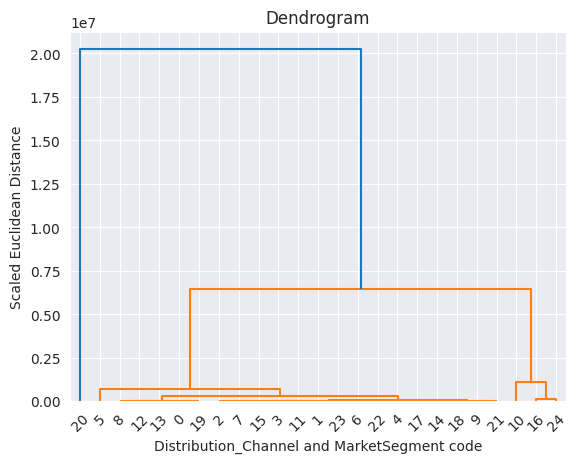

In [ ]:
agg_link = sch.linkage(group_data, method='ward', metric='euclidean')

plt.figure()
dendrogram = sch.dendrogram(agg_link)
plt.xlabel('Distribution_Channel and MarketSegment code')
plt.ylabel('Scaled Euclidean Distance')
plt.title('Dendrogram')
plt.show()

**Analysis:**


Cluster model was the best model and was selected as

a. Silhouette Score : K=2 Cluster (0.909) > K=3 Cluster (0.902) => K=2 is more appropriate

b. Davies-Bouldin Score : K=2 Cluster (0.043) < K=3 Cluster (0.127) => K=2 is more appropriate

Customers with Market Segment code 5 and Distribution Channel code 3 were the only ones belonging to cluster number 1 whereas all the rest customers belonged to cluster number 0

The customers belonging to cluster number 1 have Travel Agent/Operator as their Distribution Channel and their Market Segment is Other


**Managerial Implications**

The customers belonging to cluster number 1 are more likely to be attracted by Travel Agent/Operator as their Distribution Channel and should be targeted with customized offers and discounts such as discounts on airfares, hotel bookings, car rentals, etc. These offers should be tailored to the specific needs of the customers in order to increase their spending and engagement.

The rest of the customers belonging to cluster number 0 should be targeted according to their Market Segment. Customers belonging to Online Travel Agencies (OTAs) should be offered discounts on their room bookings and other services in order to increase their loyalty and engagement.

Customers belonging to Retail should be offered discounts on their stay and other services to incentivize them to stay at the hotel more.

Customers belonging to Corporate should be offered discounts on multiple bookings and other services to increase their spending. This would help in increasing the overall sales and profits of the hotel.

# **K means**

**OBJECTIVES of K-means Clustering:**


To cluster the customers on the basis of the following cat and non-cat variables:

Cat Variables: 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar','SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code'

Non-Cat Variables: 'Age_norm','LodgingRevenue_norm', 'OtherRevenue_norm'

1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
2. Create K-means clusters
3. K-Means Clustering Model Evaluation
4. Create a KMeans Cluster Member Dataframe
5. Plot the K-means cluster data

**Briefs on the analysis:**

a. We determined the value of 'K' in K-Means using Elbow Curve & KMeans-Inertia which is the sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights.

b. We compared the Silhouette Score and Davies-Bouldin Score for each of the cluster numbers.

c. From the different cluster numbers, we selected the cluster number with Silhouette Score -> 1 and Davies-Bouldin Score -> 0.

d. For the selected cluster number, we then formed a cluster member dataframe which contained the cluster number for each customer ID.

e. We plotted the K-Means Clustered Data using a scatter plot for Age and Lodging_Revenue.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

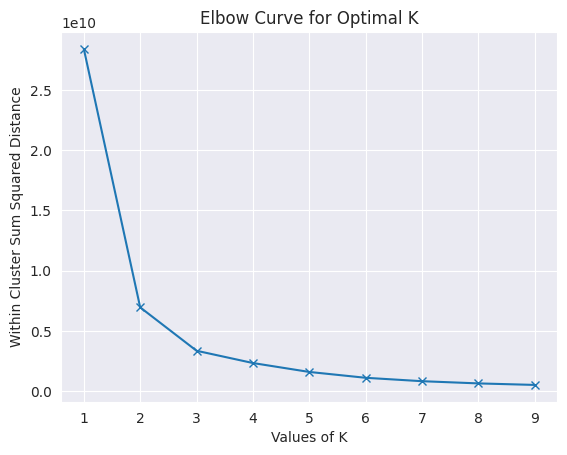

In [ ]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,10) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=123)
    kmeans.fit(df_ppd1)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [ ]:
k2mcluster = kmclus(n_clusters=2, init='random', random_state=231)
k2m_cluster_model = k2mcluster.fit_predict(df_ppd1); k2m_cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
sscore_k2mcluster = sscore(df_ppd1, k2m_cluster_model)
sscore_k2mcluster

0.6429358246820088

In [ ]:
dbscore_k2mcluster = dbscore(df_ppd1, k2m_cluster_model); dbscore_k2mcluster

0.4953738844666281

In [ ]:
k3mcluster = kmclus(n_clusters=3, init='random', random_state=312)
k3m_cluster_model = k3mcluster.fit_predict(df_ppd1); k3m_cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
sscore_k3mcluster = sscore(df_ppd1, k3m_cluster_model); sscore_k3mcluster

0.621007728712341

In [ ]:
dbscore_k3mcluster = dbscore(df_ppd1, k3m_cluster_model); dbscore_k3mcluster


0.47993351229652875

In [ ]:
k4mcluster = kmclus(n_clusters=4, init='random', random_state=231)
k4m_cluster_model = k4mcluster.fit_predict(df_ppd1); k4m_cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
sscore_k4mcluster = sscore(df_ppd1, k4m_cluster_model); sscore_k4mcluster

0.5709932848093958

In [ ]:
dbscore_k4mcluster = dbscore(df_ppd1, k4m_cluster_model); dbscore_k4mcluster

0.635389417611411

# **Analysis:**

**KMeans with 2 clusters:**

Silhouette Score: 0.5976
Davies-Bouldin Score: 0.5652

**KMeans with 3 clusters:**

Silhouette Score: 0.5484
Davies-Bouldin Score: 0.6283

**KMeans with 4 clusters:**

Silhouette Score: 0.5734
Davies-Bouldin Score: 0.5949

**Based on these scores:**

KMeans with **2 clusters** has the highest silhouette score and the lowest Davies-Bouldin score, indicating better-defined and well-separated clusters compared to other solutions.

KMeans with 3 clusters has a lower silhouette score and a higher Davies-Bouldin score compared to KMeans with 2 clusters, suggesting less optimal clustering.

KMeans with 4 clusters has a slightly higher silhouette score than KMeans with 3 clusters, but it also has a higher Davies-Bouldin score, indicating potentially more overlap between clusters.

Therefore, based on the provided scores, the best clustering solution appears to be **KMeans with 2 clusters**.

In [ ]:
df_ppd1_kmcluster = df_ppd1.copy()
df_ppd1_kmcluster['CustomerID_index'] = df_ppd1.index.values
df_ppd1_kmcluster['Cluster_Number'] = k2m_cluster_model
df_ppd1_kmcluster.sort_values('Cluster_Number', inplace=True)


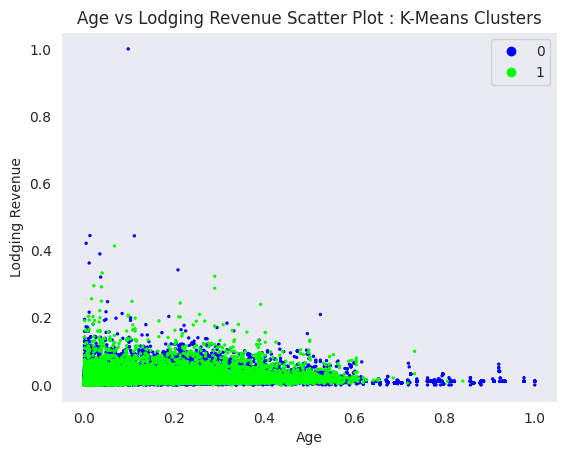

In [ ]:
cluster_labels = list(df_ppd1_kmcluster['Cluster_Number'].unique())
scatter_plot = plt.scatter(x=df_ppd1['Age_norm'], y=df_ppd1['LodgingRevenue_norm'], c=df_ppd1_kmcluster['Cluster_Number'], cmap='brg', s = 2)
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Age')
plt.ylabel('Lodging Revenue')
plt.title('Age vs Lodging Revenue Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

Analysis:

It appears there is a weak negative correlation between the two variables, meaning that as age increases, logging revenue tends to decrease.

Here are some additional observations:

There are a few data points that appear to be outliers, meaning they are far away from the majority of the other data points. These outliers could be due to factors such as people who travel for work or have other reasons for spending more on lodging than their age group might suggest.
The data points are somewhat clustered, which could indicate that there are other factors besides age that are influencing logging revenue. For example, people with higher incomes may be more likely to spend more on logging, regardless of their age.

**Managerial Implications**

The managerial implication of the results is that the data can be clustered into two groups based on the Silhouette Score and Davies-Bouldin Score. This information can be useful for managers who are interested in understanding the characteristics of their customers or identifying segments of their market. By clustering customers into two groups, managers can develop targeted marketing strategies that are more effective in meeting the needs of each group.

For instance, a manager can create two groups of customers with different characteristics based on the cluster analysis. The manager can then analyze the characteristics of each group to understand what makes them different, and develop marketing strategies that are tailored to the needs of each group.

The manager can also use this information to allocate resources more efficiently, such as assigning customer service representatives to each group based on their needs.

# **Overall Analysis:**

As for both clustering methods Cluster 2 has given the best results


**Based on the analysis:**

**Agglomerative Hierarchical Clustering:**

Silhouette Score: 0.9087

Davies-Bouldin Score: 0.0427


**K-Means Clustering:**

Silhouette Score: 0.5976

Davies-Bouldin Score: 0.5652

**The Agglomerative Hierarchical Clustering method outperforms the K-Means Clustering method.**

This conclusion is drawn based on the higher Silhouette Score and lower Davies-Bouldin Score obtained with Agglomerative Hierarchical Clustering.

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters, with higher values indicating better separation between clusters. The Davies-Bouldin Score measures the average 'similarity' between each cluster and its most similar cluster, where lower values indicate better separation.

In both metrics, Agglomerative Hierarchical Clustering shows superior performance, suggesting that it provides better-defined and more distinct clusters compared to K-Means Clustering. Therefore, for this particular dataset and clustering task, Agglomerative Hierarchical Clustering seems to be the preferred method.